# Measuring Influence on Instagram

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math 

In [2]:
usersData = pd.read_csv('instagram_data/usersData.csv', sep=',')
display(usersData.shape)
usersData.head(20)

(114781, 7)

,avg_likes,avg_comments,avg_followers,avg_posts,max_likes,min_likes,avg_views
0,97.5000,3.0000,13178.0,1967.0,113,59,333.1667
1,91.7500,9.2500,4228.0,1402.0,174,39,308.6250
2,33.0000,3.5000,2212.0,2471.0,46,23,126.7500
3,20.0000,3.5000,203.0,1838.0,26,16,65.5000
4,13.2000,1.2000,132.0,309.0,18,9,61.2000
5,109.1111,8.8889,2074.0,1583.0,215,60,638.4444
6,153.0000,12.6667,1718.0,4865.0,246,37,428.6667
7,50.5000,12.5000,511.0,739.0,62,35,148.1667
8,35.0000,0.6000,1216.0,2435.0,42,25,117.6000
9,32.0000,6.0000,1019.0,8328.0,53,14,90.0000


In [3]:
usersData.describe()

,avg_likes,avg_comments,avg_followers,avg_posts,max_likes,min_likes,avg_views
count,1.147810e+05,114781.000000,1.147810e+05,114781.000000,1.147810e+05,1.147810e+05,1.147810e+05
mean,8.980949e+02,27.756262,6.016005e+04,995.570356,1.365752e+03,5.694098e+02,7.276758e+03
std,1.063233e+04,774.559009,1.115905e+06,1927.328265,1.490799e+04,7.615014e+03,7.385628e+04
min,1.000000e+00,0.000000,3.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.500000e+00
25%,7.966670e+01,2.833300,1.384000e+03,194.000000,1.080000e+02,4.800000e+01,2.213333e+02
50%,1.579286e+02,6.571400,4.583000e+03,479.000000,2.150000e+02,1.050000e+02,6.073333e+02
75%,3.745000e+02,14.800000,1.626000e+04,1105.000000,5.460000e+02,2.400000e+02,2.072500e+03
max,1.629037e+06,242543.187500,2.316562e+08,140014.000000,2.068986e+06,1.279511e+06,1.283367e+07


In [4]:
followers_views = pd.read_csv('instagram_data/followers_views.csv', sep=',')
display(followers_views.shape)
followers_views.head(20)

(1422894, 2)

,followers,views
0,13178,250
1,13178,604
2,13178,239
3,13178,858
4,13178,271
5,13178,317
6,13178,318
7,13178,126
8,4228,372
9,4228,404


In [5]:
followers_views[followers_views.followers<followers_views.views]

,followers,views
226,11592,20880
244,6693,12449
245,6693,7031
365,19985,23627
468,41142,69495
...,...,...
1422799,103,364
1422800,103,207
1422801,103,214
1422887,27493,95484


In [6]:
followers_views.describe()

,followers,views
count,1.422894e+06,1.422894e+06
mean,1.019482e+05,1.697887e+04
std,1.426782e+06,3.572234e+05
min,0.000000e+00,1.000000e+00
25%,1.786000e+03,2.620000e+02
50%,6.393000e+03,8.350000e+02
75%,2.342400e+04,3.814000e+03
max,2.312398e+08,2.825005e+08


In [7]:
likes_views = pd.read_csv('instagram_data/likes_views.csv', sep=',')
display(likes_views.shape)
likes_views.head(20)

(1426188, 2)

,likes,views
0,98,250
1,100,604
2,109,239
3,103,858
4,106,271
5,59,317
6,113,318
7,57,126
8,172,372
9,87,404


In [8]:
likes_views[likes_views.likes>likes_views.views]

,likes,views
308,105,3
330,129,122
574,127,68
575,139,75
576,123,121
...,...,...
1426176,13,5
1426177,17,5
1426178,12,5
1426179,21,12


In [9]:
likes_views.describe()

,likes,views
count,1.426188e+06,1.426188e+06
mean,1.512143e+03,1.706994e+04
std,1.306588e+04,3.570242e+05
min,1.000000e+00,1.000000e+00
25%,8.900000e+01,2.620000e+02
50%,1.930000e+02,8.350000e+02
75%,5.550000e+02,3.820000e+03
max,2.085029e+06,2.825005e+08


## Plots

In [10]:
log_avg_views=[]
for i in range(len(usersData['avg_views'])):
    log_avg_views.append(math.log((usersData['avg_views'])[i],10))
    
log_log_avg_views=[]
for i in log_avg_views:
    log_log_avg_views.append(math.log(i,10))
    
m = np.mean(log_log_avg_views)
n = pow(10,m)
res = pow(10,n)
res

578.2659697898988

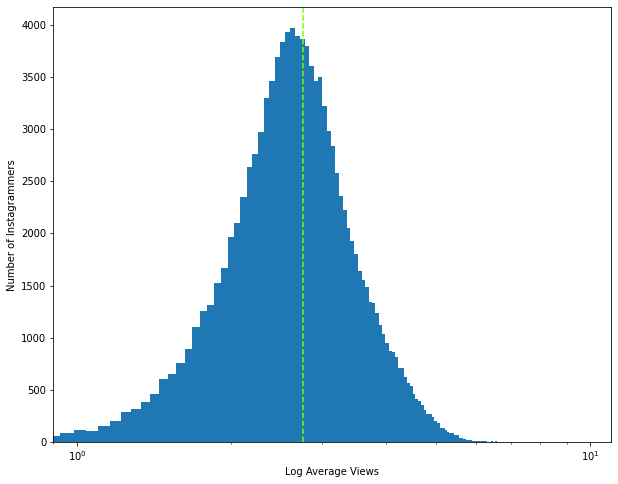

In [11]:
plt.figure(figsize=(10,8))
plt.hist(log_avg_views,bins=120)
plt.ylabel('Number of Instagrammers')
plt.xlabel('Log Average Views')
plt.xscale('log')
plt.xlim(0.9,11)
plt.axvline(x=n, linestyle = '--', color = 'lawngreen')
plt.show()

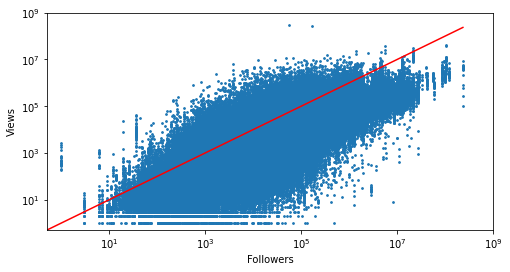

In [12]:
f = plt.figure() 
f.set_figwidth(8) 
f.set_figheight(4) 


plt.scatter(followers_views['followers'],followers_views['views'],s=3)
plt.xlabel('Followers')
plt.ylabel('Views')
plt.xscale("log")
plt.yscale("log")
plt.xlim(0.5,1000000000)
plt.ylim(0.5,1000000000)
x = np.linspace(followers_views['followers'].min(),followers_views['followers'].max(),1000)
plt.plot(x,x, c="red")
plt.show()

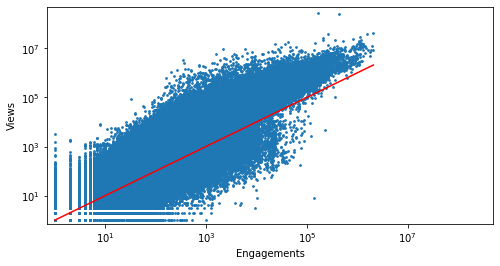

In [13]:
f = plt.figure() 
f.set_figwidth(8) 
f.set_figheight(4) 

plt.scatter(likes_views['likes'],likes_views['views'],s=3)
plt.xlabel('Engagements')
plt.ylabel('Views')
plt.xscale("log")
plt.yscale("log")
plt.xlim(0.7,500000000)
plt.ylim(0.7,500000000)
x = np.linspace(likes_views['likes'].min(),likes_views['likes'].max(),1000)
plt.plot(x,x, c="red")
plt.show()

## Univariate Outliers Removal

In [14]:
# Wir haben weniger user als im paper angegeben
# vielleicht haben wir schon daten ohne outlier
# überhaupt müsste man posts removen nicht users oder?
# Wir haben für user avgerage statistics wo über posts mitteln oder?
# Ja stimmt, außerdem wissen wir ja gar nicht welche views von den Tabellen followers_views und likes_views 
# zu welchen Usern gehören oder?

## Transform Data

In [15]:
X = usersData[["avg_comments"]]
X.insert(0, "avg_likes", usersData["avg_likes"] / np.log(usersData["avg_likes"]))
X.insert(2, "avg_followers", usersData["avg_followers"] / np.log(usersData["avg_followers"]))
X.insert(3, "like_follow_geom_mean", np.sqrt(usersData["avg_likes"] * usersData["avg_followers"]))
X.insert(4, "follower_post_ratio", usersData["avg_followers"] / usersData["avg_posts"])
X.insert(5, "comment_like_ratio", usersData["avg_comments"] / usersData["avg_likes"])
X.insert(6,"focus_ratio", usersData["max_likes"] / usersData["min_likes"])
X.insert(7, "focus_diff", usersData["max_likes"] - usersData["min_likes"])
X.insert(8, "avg_views", usersData["avg_views"])

X = X.replace(np.inf, np.nan)

X.isna().sum() 

avg_likes                4
avg_comments             0
avg_followers            0
like_follow_geom_mean    0
follower_post_ratio      0
comment_like_ratio       0
focus_ratio              0
focus_diff               0
avg_views                0
dtype: int64

In [16]:
X = X.dropna()
X_y = X

In [17]:
y = X["avg_views"] # influence
X = X.drop("avg_views", axis=1)

In [18]:
X

,avg_likes,avg_comments,avg_followers,like_follow_geom_mean,follower_post_ratio,comment_like_ratio,focus_ratio,focus_diff
0,21.288896,3.0000,1389.160618,1133.514446,6.699542,0.030769,1.915254,54
1,20.302861,9.2500,506.378577,622.831438,3.015692,0.100817,4.461538,135
2,9.437989,3.5000,287.211094,270.177719,0.895184,0.106061,2.000000,23
3,6.676164,3.5000,38.206687,63.718129,0.110446,0.175000,1.625000,10
4,5.115849,1.2000,27.033659,41.742065,0.427184,0.090909,2.000000,9
...,...,...,...,...,...,...,...,...
114776,75.071265,14.6667,175.052309,757.955116,65.684211,0.031861,24.000000,1403
114777,17.430508,5.3333,251.898468,378.528647,18.831683,0.070796,5.192308,109
114778,15.425264,0.8000,22.223522,81.317895,12.875000,0.012461,10.818182,108
114779,14.393249,2.7059,113.035280,209.341763,0.415325,0.046185,8.833333,94


In [19]:
y

0           333.1667
1           308.6250
2           126.7500
3            65.5000
4            61.2000
             ...    
114776    15346.5000
114777       76.5000
114778      177.8000
114779        8.7843
114780    18363.4286
Name: avg_views, Length: 114777, dtype: float64

In [20]:
n, p = X.shape
(n, p)

(114777, 8)

## Base Lines

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_validate, cross_val_predict
from scipy.stats import spearmanr
from sklearn.metrics import r2_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import KFold

In [22]:
def spearmanr_metric(y, y_pred):
    return spearmanr(y, y_pred).correlation

spearmanr_scorer = make_scorer(spearmanr_metric)

In [23]:
follower_base = LinearRegression()
followers = X[["avg_followers"]]

In [24]:
follower_base.fit(followers, y)
y_pred = follower_base.predict(followers)

In [25]:
r2s = []
#adj_r2s = []

for i in range(100):
    cv = KFold(5, shuffle=True, random_state=i)
    follower_base_cv = cross_validate(follower_base, followers, y, cv=cv, scoring='r2')
    r2 =follower_base_cv["test_score"].mean()
    r2s.append(r2)
    #adj_r2s.append(1-(1-r2)*(n-1)/(n-p-1))
    
print("R2", np.mean(r2s), "+/-", np.std(r2s))
print("Paper: 0.211")

R2 0.2622750205379367 +/- 0.059484070162379395
Paper: 0.211


In [26]:
rss = []
for i in range(100):
    cv = KFold(5, shuffle=True, random_state=i)
    follower_base_cv = cross_validate(follower_base, followers, y, cv=cv, scoring=spearmanr_scorer)
    rss.append(follower_base_cv["test_score"].mean())
print("rs", np.mean(rss), "+/-", np.std(rss))
print("Paper: 0.757")

rs 0.7530932960774865 +/- 1.9957492866263253e-05
Paper: 0.757


In [27]:
likes_base = LinearRegression()
likes = X[["avg_likes"]]

In [28]:
r2s = []
for i in range(100):
    cv = KFold(5, shuffle=True, random_state=i)
    likes_base_cv = cross_validate(likes_base, likes, y, cv=cv, scoring='r2')
    r2 = likes_base_cv["test_score"].mean()
    r2s.append(r2)


print("R2", np.mean(r2s), "+/-", np.std(r2s))
print("Paper: 0.666")

R2 0.6820664657850227 +/- 0.02221072582895035
Paper: 0.666


In [29]:
rss = []
for i in range(100):
    cv = KFold(5, shuffle=True, random_state=i)
    likes_base_cv = cross_validate(likes_base, likes, y, cv=cv, scoring=spearmanr_scorer)
    rss.append(likes_base_cv["test_score"].mean())
print("rs", np.mean(rss), "+/-", np.std(rss))
print("Paper: 0.859")

rs 0.8452386211217109 +/- 1.6489065019892967e-05
Paper: 0.859


## Ridge Regression

In [30]:
cv_gen = KFold(5, shuffle=True, random_state=0)

In [31]:
rr = Ridge(random_state=0)

In [32]:
rr_cv = cross_validate(rr, X, y, cv=cv_gen, scoring='r2')
rr_cv["test_score"].mean()
# paper: 0.725

0.4902328765617865

In [33]:
rr_cv = cross_validate(rr, X, y, cv=cv_gen, scoring=spearmanr_scorer)
rr_cv["test_score"].mean()
# paper: 0.848

0.8262037992543467

In [34]:
from sklearn.model_selection import GridSearchCV

In [35]:
params = {
    'random_state': [0,1,2,3,4],
    'alpha': [0.001, 0.002, 0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1., 2., 5., 10, 20, 50, 100]
}

In [36]:
rr = Ridge()
rr_gs = GridSearchCV(rr, params, n_jobs=-1, verbose=2)
rr_gs.fit(X, y)
rr_gs_res = rr_gs.cv_results_

Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    7.1s finished


In [37]:
pd.DataFrame(rr_gs_res)[["params","mean_test_score"]].sort_values("mean_test_score", ascending=False)

,params,mean_test_score
79,"{'alpha': 100, 'random_state': 4}",0.624825
78,"{'alpha': 100, 'random_state': 3}",0.624825
77,"{'alpha': 100, 'random_state': 2}",0.624825
76,"{'alpha': 100, 'random_state': 1}",0.624825
75,"{'alpha': 100, 'random_state': 0}",0.624825
...,...,...
3,"{'alpha': 0.001, 'random_state': 3}",0.624417
2,"{'alpha': 0.001, 'random_state': 2}",0.624417
1,"{'alpha': 0.001, 'random_state': 1}",0.624417
4,"{'alpha': 0.001, 'random_state': 4}",0.624417


In [38]:
from sklearn.feature_selection import RFECV

In [39]:
%%time
rr = Ridge(random_state=0)
rr_rfe = RFECV(rr, step=1, cv=5, n_jobs=-1, verbose=2)
rr_rfe.fit(X, y)

Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
CPU times: user 88.3 ms, sys: 26 ms, total: 114 ms
Wall time: 498 ms


RFECV(cv=5, estimator=Ridge(random_state=0), n_jobs=-1, verbose=2)

In [40]:
rr_rfe.ranking_

array([1, 2, 6, 5, 7, 1, 3, 4])

In [41]:
rr_rfe.support_

array([ True, False, False, False, False,  True, False, False])

In [42]:
rr_rfe.n_features_

2

## Random Forest

In [43]:
from sklearn.ensemble import RandomForestRegressor

In [44]:
rfr = RandomForestRegressor(random_state=0)

In [45]:
%%time
rfr_cv = cross_validate(rfr, X, y, cv=cv_gen, scoring='r2', n_jobs=-1)
rfr_cv["test_score"].mean()
# paper: 0.626

CPU times: user 42 ms, sys: 43.5 ms, total: 85.5 ms
Wall time: 4min 8s


0.5337963772471165

In [46]:
%%time
rfr_cv = cross_validate(rfr, X, y, cv=cv_gen, scoring=spearmanr_scorer, n_jobs=-1)
rfr_cv["test_score"].mean()
# paper: 0.869 

CPU times: user 42.3 ms, sys: 45.1 ms, total: 87.4 ms
Wall time: 4min 4s


0.867989744529938

In [47]:
%%time
rfr = RandomForestRegressor(random_state=0)
rfr_rfe = RFECV(rfr, step=1, cv=5, n_jobs=-1, verbose=2)
rfr_rfe.fit(X, y)

CPU times: user 3min 36s, sys: 1.1 s, total: 3min 37s
Wall time: 20min 19s


RFECV(cv=5, estimator=RandomForestRegressor(random_state=0), n_jobs=-1,
      verbose=2)

In [51]:
rfr_rfe.ranking_

array([1, 1, 1, 1, 1, 1, 1, 1])

In [52]:
rfr_rfe.support_

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [53]:
rfr_rfe.n_features_

8

### PCA

In [224]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
scaled_data = scaler.transform(X)

X_pca = PCA(n_components=None, svd_solver='full')
X_pca.fit(scaled_data)
x_pca = X_pca.transform(scaled_data)
print(X_pca.n_components_)
print(X_pca.explained_variance_)

8
[3.80853253 1.02988249 0.99377011 0.97501083 0.70099375 0.34800646
 0.13451436 0.00935916]


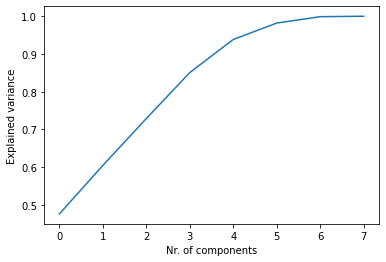

In [225]:
plt.plot(np.cumsum(X_pca.explained_variance_ratio_))
plt.xlabel("Nr. of components")
plt.ylabel("Explained variance")
plt.savefig("PCA.pdf")

In [226]:
np.cumsum(X_pca.explained_variance_ratio_)[4] # seems to be sufficient

0.9385155379034155

In [228]:
x_pca=x_pca[:,0:5]

### Minimal Ridge Regression

In [229]:
cv_gen = KFold(5, shuffle=True, random_state=0)

In [230]:
rr = Ridge(random_state=0)

In [233]:
rr_cv = cross_validate(rr, x_pca, y, cv=cv_gen, scoring='r2')
rr_cv["test_score"].mean()
# paper: 0.727

0.02288542856179112

In [234]:
rr_cv = cross_validate(rr, x_pca, y, cv=cv_gen, scoring=spearmanr_scorer)
rr_cv["test_score"].mean()
# paper: 0.818

0.7307951446925444

### Minimal Random Forest

In [236]:
rfr = RandomForestRegressor(random_state=0)

In [237]:
%%time
rfr_cv = cross_validate(rfr, x_pca, y, cv=cv_gen, scoring='r2', n_jobs=-1)
rfr_cv["test_score"].mean()
# paper: 0.611

CPU times: user 58.6 ms, sys: 87.2 ms, total: 146 ms
Wall time: 1min 18s


0.47604191202412016

In [238]:
%%time
rfr_cv = cross_validate(rfr, x_pca, y, cv=cv_gen, scoring=spearmanr_scorer, n_jobs=-1)
rfr_cv["test_score"].mean()
# paper: 0.859

CPU times: user 34.8 ms, sys: 19.6 ms, total: 54.5 ms
Wall time: 1min 18s


0.8594882462530032

## Multi-Regression

In [ ]:
# glaubt ihr es ist hier sowas in der Art gemeint? ich komm nur leider auf ganz komische Ergebnisse..

In [51]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

### Baselines

In [168]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X[['avg_followers']],y)

KMeans(n_clusters=2)

(0.5, 1000000000)

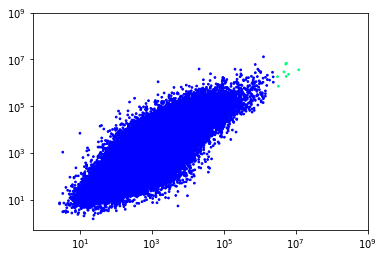

In [169]:
plt.scatter(X[['avg_followers']], y, c=kmeans.labels_, cmap='winter',s=3)
plt.xscale("log")
plt.yscale("log")
plt.xlim(0.5,1000000000)
plt.ylim(0.5,1000000000)

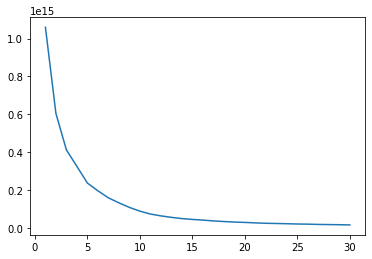

In [89]:
upper_bound = 30

models = []
inertia = []
iterations = []

for k in range(1,upper_bound+1):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_y[['avg_followers','avg_views']])
    models.append(kmeans)
    inertia.append(kmeans.inertia_)
    iterations.append(kmeans.n_iter_)

plt.plot(range(1,upper_bound+1),inertia)
plt.show()

In [90]:
silhouette_scores = []
for model in  models[1:]:
    silhouette_scores.append(
        silhouette_score(X = X_y[['avg_followers','avg_views']] , labels = model.labels_ , metric='euclidean'))
    print('*')
plt.plot(range(2,upper_bound+1),silhouette_scores)
plt.show()

*
*
*
*
*
*
*
*
*
*


KeyboardInterrupt: 

In [91]:
silhouette_scores

[0.9968915338303932,
 0.9894194087558161,
 0.9894294843231253,
 0.9768492781044915,
 0.9603744707896552,
 0.9624776558833047,
 0.9637271761488337,
 0.9615535912436831,
 0.958967585172242,
 0.9383551013426222]

In [92]:
def argmax(iterable):
    return max(enumerate(iterable), key=lambda x: x[1])[0]

kmeans = models[argmax(silhouette_scores)+1] 
kmeans

KMeans(n_clusters=2)

In [71]:
y = kmeans.labels_
cluster_1 = X_y[y == 0] 
cluster_2 = X_y[y == 1] 

In [106]:
y1 = cluster_1["avg_views"]
X1 = cluster_1[["avg_followers"]]
y2 = cluster_2["avg_views"]
X2 = cluster_2[["avg_followers"]]

In [107]:
follower_base_multi1 = LinearRegression()
follower_base_multi1.fit(X1, y1)
y_pred_multi1 = follower_base_multi1.predict(X1)

In [108]:
follower_base_multi2 = LinearRegression()
follower_base_multi2.fit(X2, y2)
y_pred_multi2 = follower_base_multi2.predict(X2)

In [109]:
r2s = []

for i in range(100):
    cv = KFold(5, shuffle=True, random_state=i)
    follower_base_cv = cross_validate(follower_base_multi1, X1, y1, cv=cv, scoring='r2')
    r2 =follower_base_cv["test_score"].mean()
    r2s.append(r2)
    
m1=np.mean(r2s)
    
print("R2", np.mean(r2s), "+/-", np.std(r2s))
print("Paper: 0.204")

R2 0.30411176338201995 +/- 0.004639624572857719
Paper: 0.204


In [110]:
r2s = []

for i in range(100):
    cv = KFold(5, shuffle=True, random_state=i)
    follower_base_cv = cross_validate(follower_base_multi2, X2, y2, cv=cv, scoring='r2')
    r2 =follower_base_cv["test_score"].mean()
    r2s.append(r2)
    
m2=np.mean(r2s)
    
print("R2", np.mean(r2s), "+/-", np.std(r2s))
print("Paper: 0.204")

R2 -2.3125523391208436 +/- 3.3345273202925556
Paper: 0.204


In [111]:
(m1+m2)/2

-1.0042202878694118

In [112]:
rss = []
for i in range(100):
    cv = KFold(5, shuffle=True, random_state=i)
    follower_base_cv = cross_validate(follower_base_multi1, X1, y1, cv=cv, scoring=spearmanr_scorer)
    rss.append(follower_base_cv["test_score"].mean())
rs1 =np.mean(rss)
print("rs", np.mean(rss), "+/-", np.std(rss))
print("Paper: 0.725")

rs 0.7529571980820908 +/- 2.1851269857498463e-05
Paper: 0.725


In [113]:
rss = []
for i in range(100):
    cv = KFold(5, shuffle=True, random_state=i)
    follower_base_cv = cross_validate(follower_base_multi2, X2, y2, cv=cv, scoring=spearmanr_scorer)
    rss.append(follower_base_cv["test_score"].mean())
rs2 =np.mean(rss)
print("rs", np.mean(rss), "+/-", np.std(rss))
print("Paper: 0.725")

rs 0.12779999999999997 +/- 0.23891245258462354
Paper: 0.725


In [114]:
(rs1+rs2)/2

0.44037859904104537

In [115]:
y1 = cluster_1["avg_views"]
X1 = cluster_1[["avg_likes"]]
y2 = cluster_2["avg_views"]
X2 = cluster_2[["avg_likes"]]

In [116]:
follower_base_multi1 = LinearRegression()
follower_base_multi1.fit(X1, y1)
y_pred_multi1 = follower_base_multi1.predict(X1)

In [117]:
follower_base_multi2 = LinearRegression()
follower_base_multi2.fit(X2, y2)
y_pred_multi2 = follower_base_multi2.predict(X2)

In [118]:
r2s = []

for i in range(100):
    cv = KFold(5, shuffle=True, random_state=i)
    follower_base_cv = cross_validate(follower_base_multi1, X1, y1, cv=cv, scoring='r2')
    r2 =follower_base_cv["test_score"].mean()
    r2s.append(r2)
    
m1=np.mean(r2s)
    
print("R2", np.mean(r2s), "+/-", np.std(r2s))
print("Paper: 0.204")

R2 0.6841767849653192 +/- 0.0035781918074417733
Paper: 0.204


In [119]:
r2s = []

for i in range(100):
    cv = KFold(5, shuffle=True, random_state=i)
    follower_base_cv = cross_validate(follower_base_multi2, X2, y2, cv=cv, scoring='r2')
    r2 =follower_base_cv["test_score"].mean()
    r2s.append(r2)
    
m2=np.mean(r2s)
    
print("R2", np.mean(r2s), "+/-", np.std(r2s))
print("Paper: 0.204")

R2 -2.6390412257005176 +/- 2.94927758607524
Paper: 0.204


In [120]:
(m1+m2)/2

-0.9774322203675991

In [121]:
rss = []
for i in range(100):
    cv = KFold(5, shuffle=True, random_state=i)
    follower_base_cv = cross_validate(follower_base_multi1, X1, y1, cv=cv, scoring=spearmanr_scorer)
    rss.append(follower_base_cv["test_score"].mean())
rs1 =np.mean(rss)
print("rs", np.mean(rss), "+/-", np.std(rss))
print("Paper: 0.725")

rs 0.8451527352374572 +/- 1.557532533105827e-05
Paper: 0.725


In [122]:
rss = []
for i in range(100):
    cv = KFold(5, shuffle=True, random_state=i)
    follower_base_cv = cross_validate(follower_base_multi2, X2, y2, cv=cv, scoring=spearmanr_scorer)
    rss.append(follower_base_cv["test_score"].mean())
rs2 =np.mean(rss)
print("rs", np.mean(rss), "+/-", np.std(rss))
print("Paper: 0.725")

rs 0.14959999999999998 +/- 0.16575837837044616
Paper: 0.725


In [123]:
(rs1+rs2)/2

0.49737636761872855

### Ridge Regression

In [125]:
y1 = cluster_1["avg_views"]
X1 = cluster_1.drop("avg_views", axis=1)
y2 = cluster_2["avg_views"]
X2 = cluster_2.drop("avg_views", axis=1)

In [126]:
cv_gen = KFold(5, shuffle=True, random_state=0)

In [127]:
rr = Ridge(random_state=0)

In [131]:
rr_cv = cross_validate(rr, X1, y1, cv=cv_gen, scoring='r2')
r1=rr_cv["test_score"].mean()
r1
# paper: 0.727

0.7011290816986406

In [132]:
rr_cv = cross_validate(rr, X2, y2, cv=cv_gen, scoring='r2')
r2=rr_cv["test_score"].mean()
r2
# paper: 0.727

-67.59912585885108

In [136]:
(r1+r2)/2

-33.44899838857622

In [133]:
rr_cv = cross_validate(rr, X1, y1, cv=cv_gen, scoring=spearmanr_scorer)
s1=rr_cv["test_score"].mean()
s1
# paper: 0.821

0.8462637147607438

In [134]:
rr_cv = cross_validate(rr, X2, y2, cv=cv_gen, scoring=spearmanr_scorer)
s2=rr_cv["test_score"].mean()
s2
# paper: 0.821

0.12000000000000002

In [135]:
(s1+s2)/2

0.4831318573803719

### Random Forest

In [ ]:
y1 = cluster_1["avg_views"]
X1 = cluster_1.drop("avg_views", axis=1)
y2 = cluster_2["avg_views"]
X2 = cluster_2.drop("avg_views", axis=1)

In [139]:
rfr = RandomForestRegressor(random_state=0)

In [145]:
%%time
rfr_cv = cross_validate(rfr, X1, y1, cv=cv_gen, scoring='r2', n_jobs=-1)
r1=rfr_cv["test_score"].mean()
r1
# paper: 0.621

CPU times: user 37.6 ms, sys: 24.5 ms, total: 62.1 ms
Wall time: 1min 45s


0.7395229287678871

In [146]:
%%time
rfr_cv = cross_validate(rfr, X2, y2, cv=cv_gen, scoring='r2', n_jobs=-1)
r2=rfr_cv["test_score"].mean()
r2
# paper: 0.621

CPU times: user 11.1 ms, sys: 2.73 ms, total: 13.9 ms
Wall time: 225 ms


-0.9528744953732071

In [147]:
(r1+r2)/2

-0.10667578330266003

In [142]:
%%time
rfr_cv = cross_validate(rfr, X1, y1, cv=cv_gen, scoring=spearmanr_scorer, n_jobs=-1)
s1=rfr_cv["test_score"].mean()
s1
# paper: 0.861 

CPU times: user 36.6 ms, sys: 24.1 ms, total: 60.8 ms
Wall time: 1min 47s


0.868155712668153

In [143]:
%%time
rfr_cv = cross_validate(rfr, X2, y2, cv=cv_gen, scoring=spearmanr_scorer, n_jobs=-1)
s2=rfr_cv["test_score"].mean()
s2
# paper: 0.861

CPU times: user 10.8 ms, sys: 2.69 ms, total: 13.5 ms
Wall time: 408 ms


0.45999999999999996

In [144]:
(s1+s2)/2

0.6640778563340765